In [232]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import keras_preprocessing
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [ ]:
# Unzip fruits folder
!unzip -q '/content/drive/My Drive/fruits-5.zip'

In [234]:
# GDRIVEPATH='/content/fruits-360_dataset/fruits-360'
GDRIVEPATH='/content/fruits-360-dataset/fruits-360'

In [235]:
base_dir = GDRIVEPATH

# Directories
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Training
train_apple_dir = os.path.join(train_dir, 'apple')
train_banana_dir = os.path.join(train_dir, 'banana')
train_cherry_dir = os.path.join(train_dir, 'cherry')
train_grape_dir = os.path.join(train_dir, 'grape')
train_peach_dir = os.path.join(train_dir, 'peach')

# Validation
validation_apple_dir = os.path.join(validation_dir, 'apple')
validation_banana_dir = os.path.join(validation_dir, 'banana')
validation_cherry_dir = os.path.join(validation_dir, 'cherry')
validation_grape_dir = os.path.join(validation_dir, 'grape')
validation_peach_dir = os.path.join(validation_dir, 'peach')

# Test
test_apple_dir = os.path.join(test_dir, 'apple')
test_banana_dir = os.path.join(test_dir, 'banana')
test_cherry_dir = os.path.join(test_dir, 'cherry')
test_grape_dir = os.path.join(test_dir, 'grape')
test_peach_dir = os.path.join(test_dir, 'peach')


In [236]:
print('total training apple images:', len(os.listdir(train_apple_dir)))
print('total training banana images:', len(os.listdir(train_banana_dir)))
print('total training cherry images:', len(os.listdir(train_cherry_dir)))
print('total training grape images:', len(os.listdir(train_grape_dir)))
print('total training peach images:', len(os.listdir(train_peach_dir)))

total training apple images: 493
total training banana images: 491
total training cherry images: 493
total training grape images: 985
total training peach images: 493


In [237]:
# Print first 10 images from directories to verify contents

apple_train_dir_names = os.listdir(train_apple_dir)
apple_validation_dir_names = os.listdir(validation_apple_dir)
apple_test_dir_names = os.listdir(test_apple_dir)

print('Training: ', apple_train_dir_names[:10])
print('Validation: ',apple_validation_dir_names[:10])
print('Test: ',apple_test_dir_names[:10])

Training:  ['284_100.jpg', 'r_283_100.jpg', '305_100.jpg', 'r_246_100.jpg', 'r_159_100.jpg', 'r_128_100.jpg', '309_100.jpg', 'r_318_100.jpg', 'r_225_100.jpg', 'r_160_100.jpg']
Validation:  ['129_100.jpg', '109_100.jpg', '173_100.jpg', '146_100.jpg', '160_100.jpg', '121_100.jpg', '154_100.jpg', '23_100.jpg', '170_100.jpg', '102_100.jpg']
Test:  ['r_4_100.jpg', '55_100.jpg', 'r_72_100.jpg', 'r_8_100.jpg', 'r_97_100.jpg', 'r_38_100.jpg', '38_100.jpg', 'r_39_100.jpg', '36_100.jpg', 'r_62_100.jpg']


In [238]:
# Building the network
from keras import layers
from keras import models

model = models.Sequential()
# First
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# Second
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Third
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Fourth
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Fifth
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# Flatten and Dropout
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
# 512 neurons in hidden layer
model.add(layers.Dense(512, activation='relu'))
# Output 5 categories
model.add(layers.Dense(5, activation='softmax'))


In [239]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 15, 15, 128)     

In [240]:
# Selecting categorical_crossentropy as a loss function and RMSprop optimizer
from keras import optimizers

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])


In [241]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20)
        # class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20)
        # class_mode='binary')


Found 2950 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [242]:
for data_batch, labels_batch in train_generator:
     print('data batch shape:', data_batch.shape)
     print('labels batch shape:', labels_batch.shape)
     break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)


In [243]:
# Training
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/15
30/30 [==============================] - 43s 1s/step - loss: 1.7503 - acc: 0.5150 - val_loss: 0.2894 - val_acc: 0.8000
Epoch 2/15
30/30 [==============================] - 42s 1s/step - loss: 0.5657 - acc: 0.8183 - val_loss: 0.2015 - val_acc: 0.9140
Epoch 3/15
30/30 [==============================] - 42s 1s/step - loss: 0.3337 - acc: 0.8600 - val_loss: 0.2236 - val_acc: 0.9980
Epoch 4/15
30/30 [==============================] - 41s 1s/step - loss: 0.3760 - acc: 0.8559 - val_loss: 0.1035 - val_acc: 0.8000
Epoch 5/15
30/30 [==============================] - 42s 1s/step - loss: 0.2492 - acc: 0.9017 - val_loss: 0.1341 - val_acc: 0.9480
Epoch 6/15
30/30 [==============================] - 42s 1s/step - loss: 0.3210 - acc: 0.8683 - val_loss: 0.1247 - val_acc: 0.8560
Epoch 7/15
30/30 [==============================] - 41s 1s/step - loss: 0.1544 - acc: 0.9300 - val_loss: 0.0445 - val_acc: 1.0000
Epoch 8/15
30/30 [==============================] - 45s 2s/step - loss: 0.2922 - acc: 0.91

In [244]:
model.save(GDRIVEPATH+'fruits_trained.h5')

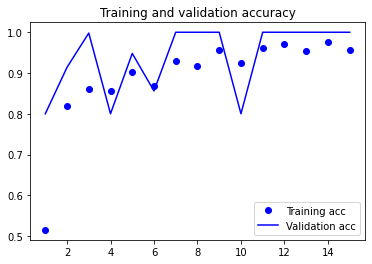

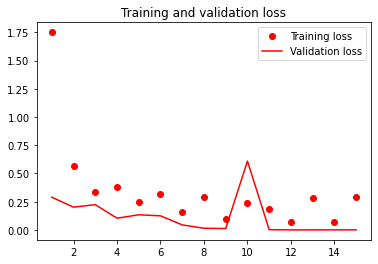

In [245]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [246]:
# Importing and validating the new model
model_dir = '/content/fruits-360-dataset/fruits-360fruits_trained.h5'

# Loading the h5 file
fruit_model = tf.keras.models.load_model(
    model_dir,
    custom_objects=None,
    compile=True
)

In [247]:
# Evaaluation of the model
loss,acc = fruit_model.evaluate(validation_generator, verbose=2)
print('Restored model, Accuracy: {:5.2f}%'.format(100*acc))

25/25 - 6s - loss: 4.1975e-04 - acc: 1.0000
Restored model, Accuracy: 100.00%
